In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

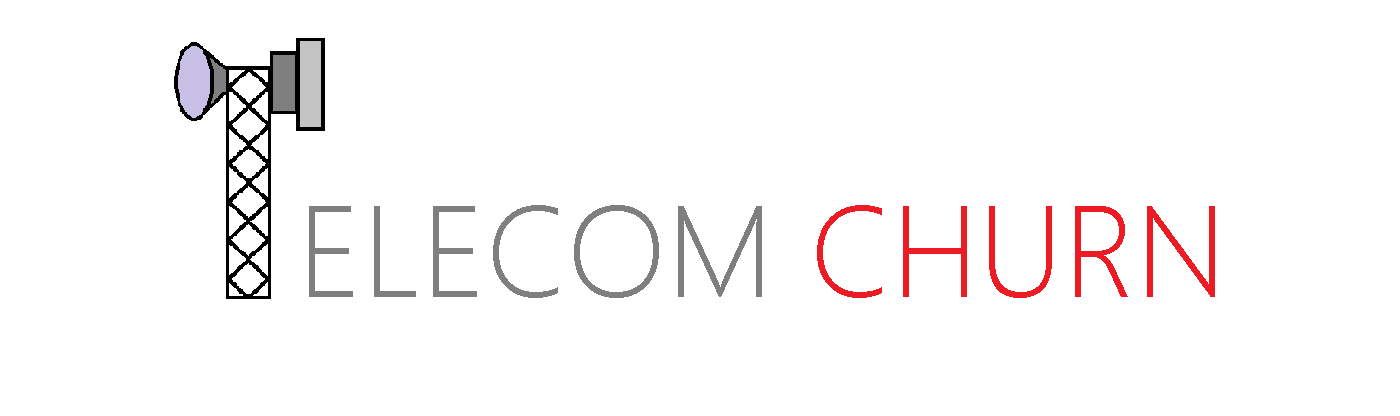

A Telecommunication Company '**TELCOM**' is currently invested in retaining their existing customers than attracting new ones, because:
* It would cost less.
* Customer loyalty is more volatile for new customer than an existing customer so working with them would prove difficult.

But they dont have any method to know the customers that might churn. So a solution has to be devised to predict customers that may leave or *churn* in future so that appropriate actions can be taken to prevent it in time.

We are provided with a telecom_user csv_file which consists of data which will be used to know about *the customers, the services they use, payment modes, their relation with the company*,and more to create an ML solution.

# Exploratory Data Analysis

In [ ]:
table = pd.read_csv('../input/telecomds/telecom_users _new.csv')

In [ ]:
table.head()

In [ ]:
table.shape

> The dataset contains details of 5986 unique customers for 22 attributes.

In [ ]:
table.columns

In order to simplify things I am going to divide the data into 3:
*     Attributes like:- **gender, SeniorCitizen,Partner,Dependents** give us an idea about the customer's *personal situation(ps)*.(For example - A service could used by the whole family)
*     Attributes like:- **PhoneService, MultipleLines, InternetService,  OnlineSecurity, OnlineBackup,  DeviceProtection, TechSupport, StreamingTV, StreamingMovies** tells us about the *services subscribed(ss)* by customer.
*     Attributes like - **tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, Totalcharges, Churn** tells us about the *relation(rl)* between the customer and the company.

In [ ]:
ps = table[['gender', 'SeniorCitizen', 'Partner','Dependents','Churn']]
ss = table[['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies','Churn']]
rl = table[['tenure','Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn']]

# About Customers

In [ ]:
fig, ax = plt.subplots()

ax.pie(ps.SeniorCitizen.value_counts(normalize = False),
       labels = ['Young','Old'],
       labeldistance=1.2,
       colors = ('dimgrey','silver'),
       explode = (0.1, 0)
      )
ax.pie(ps.gender.value_counts(normalize = False),
       labels = ['Men','Women'],
       labeldistance=1.2,
       colors = ('royalblue','deeppink'),
       explode = (0.1, 0),
       startangle = 180,
       center = (3,0)
      )
ax.pie(ps.Partner.value_counts(normalize = False),
       labels = ['Single','Married'],
       labeldistance=1.2,
       colors = ('khaki','gold'),
       explode = (0.1, 0),
       center = (6,0)
      )
ax.pie(ps.Dependents.value_counts(normalize = False),
       labels = ['No Kids','Kids'],
       labeldistance=1.4,
       colors = ('greenyellow','yellowgreen'),
       explode = (0.1, 0),
       center = (9,0),
      )
ax.plot()

          Peer Group                          Gender                       Marital status                      Dependents

* Majority of customers are Young
* Almost equal distribution in gender
* Almost equal distribution of marital status
* Majority of customers has no kids

We can also add churn to the grouping so the above charts become:

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(ps.groupby(['SeniorCitizen'])['Churn'].value_counts(normalize = False),
       labels = ['','Churn','','Churn'],
       #labeldistance=1.4,
       colors = ('dimgrey','indianred','silver','salmon'),
       explode = (0,0.2,0, 0.2),
       center = (0,0),
      )
ax1.pie(ps.groupby(['gender'])['Churn'].value_counts(normalize = False),
       labels = ['','','',''],
       #labeldistance=1.4,
       #startangle = 180,
       colors = ('deeppink','salmon','royalblue','indianred'),
       explode = (0,0.2,0, 0.2),
       center = (3,0),
      )
ax1.pie(ps.groupby(['Partner'])['Churn'].value_counts(normalize = False),
       labels = ['','','',''],
       #labeldistance=1.4,
       colors = ('khaki','salmon','gold','indianred'),
       explode = (0,0.2,0, 0.2),
       center = (6,0),
      )
ax1.pie(ps.groupby(['Dependents'])['Churn'].value_counts(normalize = False),
       labels = ['','','',''],
       #labeldistance=1.4,
       colors = ('greenyellow','salmon','yellowgreen','indianred'),
       explode = (0,0.2,0, 0.2),
       center = (9,0),
      )
plt.plot()

       Peer Group                        Gender                       Marital status                      Dependents

* Young people churn out more.
* Almost equal churn percentage for both genders.
* Single customers churn out more than married customers.
* Customers with no kids churn out more.

So Customers who are married and have kids is good for the company.

We can also create a complete picture of a customer's personal situation by combining the SeniorCitizen, Partner, dependents into one.(I have exluded gender because it doesnt contribute much that a customer might leave.)

Which will look like this-

In [ ]:
ps.groupby(['SeniorCitizen','Partner','Dependents'])['Churn'].value_counts()

Or like this table I made in MSPaint![telecom churnYN going on NB2.png](attachment:0c2884c6-feb6-4487-b512-3555209a0921.png)

As we can observe:
   * Partners and dependents decrease the churn possibility.

# About Services

The company offer services like:
* Phone services
* Internet services
* Security services
* Streaming services

And these could also be the reasons why a customer might leave

**Which services results in more churn out?**

* Customers who use **Phone service only**.

In [ ]:
ss[(ss['PhoneService'] == 'Yes') & (ss['InternetService'] == 'No')].Churn.value_counts(normalize = True).plot.barh(color = ('blue','red'),title = "Churn")

* Customers who use **Internet service only**

In [ ]:
ss[(ss['PhoneService'] == 'No') & (ss['InternetService'] != 'Yes' )].Churn.value_counts(normalize = True).plot.barh(color = ('blue','red'),title = "Churn")

In [ ]:
print(ss[(ss['PhoneService'] == 'No') & (ss['InternetService'] != 'Yes' )].shape)
ss[(ss['PhoneService'] == 'No') & (ss['InternetService'] != 'Yes' )].InternetService.value_counts()

It is interesting to note that customers who use **InternetService only**, use **DSL!**

In [ ]:
fig2, ax2 = plt.subplots()
ax2.pie(ss.InternetService.value_counts(),
       labels = ['Fiber optic','DSL','No'],
       #labeldistance=1.4,
       colors = ('yellow','blue','silver'),
       #explode = (0,0.1,0, 0.1),
       center = (0,0),
      )
ax2.pie(ss.groupby(['InternetService'])['Churn'].value_counts(),
       labels = ['','Churn','','Churn','','Churn'],
       labeldistance=1.2,
       colors = ('blue','royalblue','yellow','gold','silver','lightgrey'),
       explode = (0,0.2,0, 0.2,0,0.2),
       center = (3,0),
      )
plt.plot()

> For **DSL**: **1** in **5** leave

> For **Fiber optic**: **2** in **5** leave

> For **No Internet Service**: **1** in **13** leave

**So company phone services are pretty good on its own!**

**Customers are more satisfied with DSL services than Fiber optic Internet connections!**

In [ ]:
ss.groupby(['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'])['Churn'].value_counts()

This gives a bigtable so I switched to google sheets to create the infographics below :

We can make Tiers or **Levels** (*based of tenure converted into years*. Example- tenure = 13 months will be 1 year/Level1 ,9 months will be 0 year/LevelA) 

+

**customerType** (*upon combining Partner, SeniorCitizen, dependents*. Example - if SeniorCitizen = 0, Partner = 1, Dependents = 1, will be Young+Married+Kids/YYdd(refer table below)). This can be done by categorizing **customerType** for every year

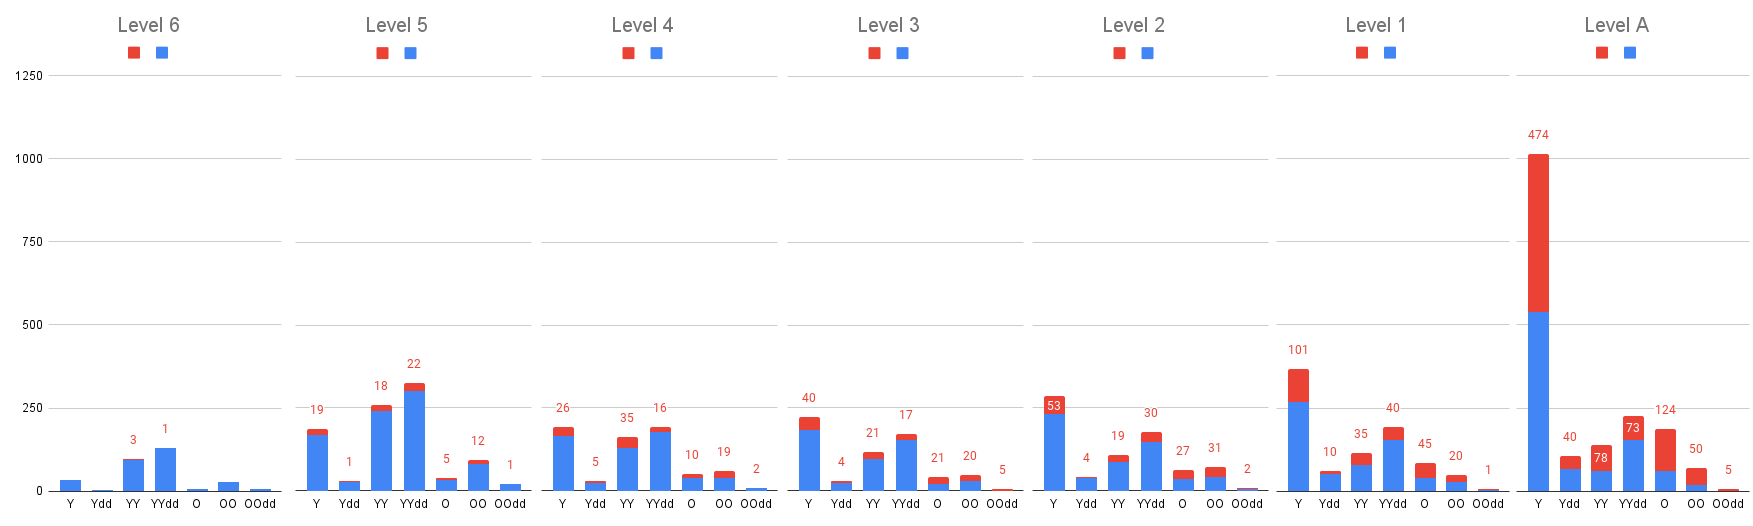

* Most people leave within the first year!

**I have excluded "O-dd" customerType due to less data for it.**

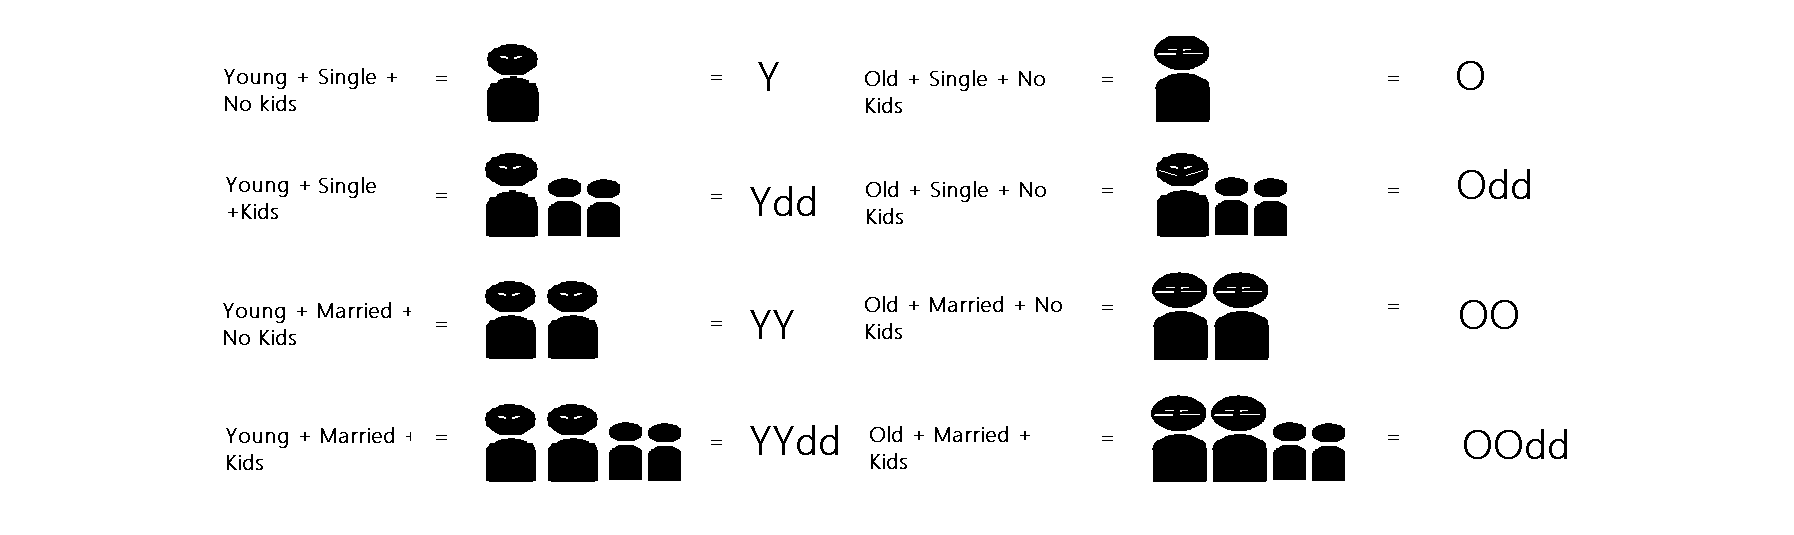

* As we can see maximum Churns occur in the first year itself and that too by Young Single No kids customers.
* YYdd i.e. Young Married Customers with kids are the premium customers.

## What about soft services?

Many customers do not purchase security services with their internet connections throughout the levels.

A customer can choose either one service or a combination of services(Max Four services). These include:
* Device Protection
* Tech Support
* Online Security
* Online Backup

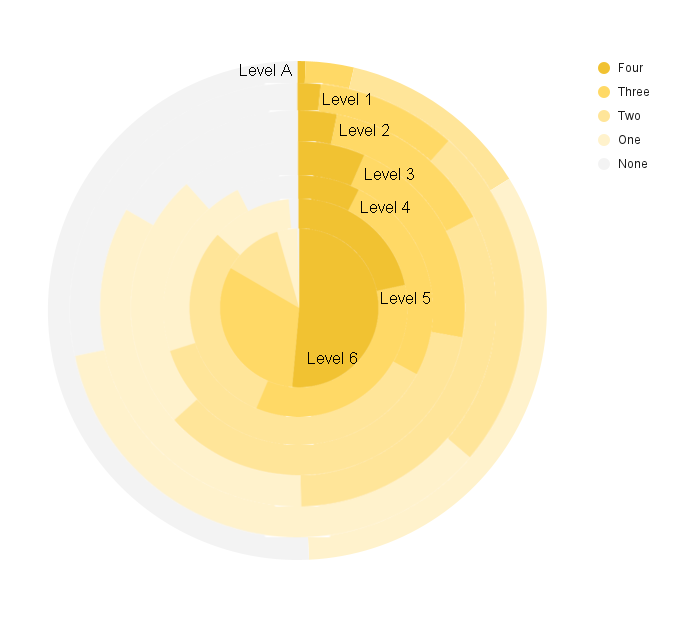

* Half in Level A have no security services.
* Purchases or subscriptions of security rise as we move up the levels.
* Almost all have security services in Level 6 out of which half of them have all four security services!

It is clear that as the levels(time with the company) increase, customers purchase more software security services and churn decreases. So S/W security service reduce churn.

------------------------------------------------------------

##  Preparing the data for ML

In [ ]:
pp.ProfileReport(table)

No missing values present and ready to be transformed

Correlations does not show all the attributes because they are in object data type which has to be changed.

In [ ]:
table.head()

In [ ]:
table = table.drop(['Unnamed: 0'], axis = 1)

In [ ]:
table.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
number = LabelEncoder()

In [ ]:
table['Partner'] = number.fit_transform(table['Partner'].astype(str))
table['Dependents'] = number.fit_transform(table['Dependents'].astype(str))
table['PhoneService'] = number.fit_transform(table['PhoneService'].astype(str))
table['MultipleLines'] = number.fit_transform(table['MultipleLines'].astype(str))
table['InternetService'] = number.fit_transform(table['InternetService'].astype(str))
table['OnlineSecurity'] = number.fit_transform(table['OnlineSecurity'].astype(str))
table['OnlineBackup'] = number.fit_transform(table['OnlineBackup'].astype(str))
table['DeviceProtection'] = number.fit_transform(table['DeviceProtection'].astype(str))
table['TechSupport'] = number.fit_transform(table['TechSupport'].astype(str))
table['StreamingTV'] = number.fit_transform(table['StreamingTV'].astype(str))
table['StreamingMovies'] = number.fit_transform(table['StreamingMovies'].astype(str))
table['Contract'] = number.fit_transform(table['Contract'].astype(str))
table['PaperlessBilling'] = number.fit_transform(table['PaperlessBilling'].astype(str))
table['PaymentMethod'] = number.fit_transform(table['PaymentMethod'].astype(str))
table['Churn'] = number.fit_transform(table['Churn'].astype(str))
table['gender'] = number.fit_transform(table['gender'].astype(str))

In [ ]:
table.head()

tenure could be converted into years

In [ ]:
i = 0
for tenure in table.tenure:
    if (tenure < 12):
        table.tenure[i] = 0  #print("Tenure is 0 year")
        #table['tenure'] = table['tenure'].replace([tenure],0)
    elif ((tenure >= 12) & (tenure < 24)):
        table.tenure[i] = 1#print("Tenure is 1 year")
        #table['tenure'] = table['tenure'].replace([tenure],1)
    elif ((tenure >= 24) & (tenure < 36)):
        table.tenure[i] = 2#print("Tenure is 2 year")
        #table['tenure'] = table['tenure'].replace([tenure],2)
    elif ((tenure>= 36) & (tenure < 48)):
        table.tenure[i] = 3#print("Tenure is 3 year")
        #table['tenure'] = table['tenure'].replace([tenure],3)
    elif ((tenure>= 48) & (tenure < 60)):
        table.tenure[i]= 4#print("Tenure is 4 year")
        #table['tenure'] = table['tenure'].replace([tenure],4)
    elif ((tenure>= 60) & (tenure < 72)):
        table.tenure[i] = 5#print("Tenure is 5 year")
        #table['tenure'] = table['tenure'].replace([tenure],5)
    elif (tenure>= 72):
        table.tenure[i] = 6#print("Tenure is 6 year")
        #table['tenure'] = table['tenure'].replace([tenure],6)
    i = i+1
#table.tenure

In [ ]:
table.head()

In [ ]:
table.dtypes

In [ ]:
pp.ProfileReport(table)

* No Missing values.
* All attributes in suitable data type.

All ready for modelling!

Steps I will follow :

    * Splitting data into Test/Train
    * Creating ML objects
    * Training the model
    * Checking accuracy and observe confusion matrix 
    * Parameter tuning with GridSearchCV
    * Comparing the obtained models.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X = table[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract',
           'Dependents','Partner','tenure','PaperlessBilling','MonthlyCharges','TotalCharges']]
y = table['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
def confusion_matrix(classifier):
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     #display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

In [ ]:
rfclf = RandomForestClassifier()

In [ ]:
rfclf.fit(X_train,y_train)

In [ ]:
rfclf_pred = rfclf.predict(X_test)
print("Random Forest: ",accuracy_score(y_test,rfclf_pred))

In [ ]:
confusion_matrix(rfclf)

### XGBoost

In [ ]:
xgbclf = xgb.XGBClassifier()

In [ ]:
xgbclf.fit(X_train,y_train)
xgbpred =xgbclf.predict(X_test)
print("XGBoost: ",accuracy_score(y_test,xgbpred))

In [ ]:
confusion_matrix(xgbclf)

In [ ]:
#xgb_params = {'booster' :['gbtree','gblinear','dart']}

#xgbgrid = GridSearchCV(xgbclf, param_grid = xgb_params, cv = 5, n_jobs = -1)
#xgbgrid.fit(X_train,y_train)

#print("For XGB >>>-------->")
#print("Best Estimator > ",xgbgrid.best_estimator_)
#print("Best Score > ",xgbgrid.best_score_)
#print("Best Parameters > ",xgbgrid.best_params_)

In [ ]:
xgb_tuned = xgb.XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_tuned.fit(X_train,y_train)

In [ ]:
confusion_matrix(xgb_tuned)

In [ ]:
xgb_tuned_pred = xgb_tuned.predict(X_test)
print("XGBoost_tuned: ",accuracy_score(y_test,xgb_tuned_pred))

In [ ]:
#import pickle
  
# Save the trained model as a pickle string.
#saved_model = pickle.dumps(xgb_tuned)

In [ ]:
  
# Load the pickled model
#xgb_1_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
#knn_from_pickle.predict(X_test)

In [ ]:
#import joblib

In [ ]:
  
# Save the model as a pickle in a file
#joblib.dump(xgb_tuned, 'xgb_1_ever.pkl')

In [ ]:
  
# Load the model from the file
#knn_from_joblib = joblib.load('../input/not-dataset/xgb_1_ever.pkl')

In [ ]:
  
# Use the loaded model to make predictions
#knn_from_joblib.predict(X_test)

### Naive Bayes

In [ ]:
nbnom = MultinomialNB()
nbgauss = GaussianNB()
nbBern = BernoulliNB()

In [ ]:
nbBern.fit(X_train,y_train)
nbBern_pred = nbBern.predict(X_test)


print("BernoulliNB: ",accuracy_score(y_test,nbBern_pred))

In [ ]:
confusion_matrix(nbBern)

In [ ]:
nbgauss.fit(X_train,y_train)
nbgauss_pred = nbgauss.predict(X_test)
print("GaussianNB: ",accuracy_score(y_test,nbgauss_pred))

In [ ]:
confusion_matrix(nbgauss)

Naive Bayes Gaussian looks like a pretty good model

In [ ]:
#nbG_param = {'var_smoothing':np.logspace(0,-9, num=100)}

#nbG_grid = GridSearchCV(nbgauss, param_grid = nbG_param, cv = 10, n_jobs= -1)
#nbG_grid.fit(X_train,y_train)

#print("For NBGauss >>>-------->")
#print("Best Estimator > ",nbG_grid.best_estimator_)
#print("Best Score > ",nbG_grid.best_score_)
#print("Best Parameters > ",nbG_grid.best_params_)
#confusion_matrix(nbG_grid)

In [ ]:
nbgauss_tuned = GaussianNB(var_smoothing = 2.310129700083158e-06)

In [ ]:
nbgauss_tuned.fit(X_train,y_train)
nbgauss_tuned_pred = nbgauss_tuned.predict(X_test)
print("GaussianNB: ",accuracy_score(y_test,nbgauss_tuned_pred))

In [ ]:
confusion_matrix(nbgauss_tuned)

I dont know if this is an improvement because after tuning it is just predicting more zeroes, while earlier it was balanced.

In [ ]:
nbnom.fit(X_train,y_train)
nbnom_pred = nbnom.predict(X_test)
print("MultinominalNB: ",accuracy_score(y_test,nbnom_pred))

In [ ]:
confusion_matrix(nbnom)

### LightGradientBoosting

In [ ]:
import lightgbm as lgb

In [ ]:
lgbclf = lgb.LGBMClassifier()

In [ ]:
lgbclf.fit(X_train,y_train)
lgbclf_pred = lgbclf.predict(X_test)
print("LGBoost: ",accuracy_score(y_test,lgbclf_pred))

In [ ]:
confusion_matrix(lgbclf)

In [ ]:
#lgb_param = {
   # 'boosting_type': ['gbdt', 'goss', 'dart'],
    #'num_leaves': list(range(2, 20)),
    #'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    #'subsample_for_bin': list(range(20000, 300000, 20000)),
    #'min_child_samples': list(range(20, 500, 5)),
    #'reg_alpha': list(np.linspace(0, 1,num =10)),
    #'reg_lambda': list(np.linspace(0, 1,num =10)),
    #'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    #'subsample': list(np.linspace(0.5, 1, 100)),
    #'is_unbalance': [True, False]
#}

In [ ]:
#grid_lgb = GridSearchCV(lgbclf, param_grid = lgb_param, cv = 10, n_jobs = -1)

In [ ]:
#grid_lgb.fit(X_train,y_train)

In [ ]:
#print("For LGB >>>-------->")
#print("Best Estimator > ",grid_lgb.best_estimator_)
#print("Best Score > ",grid_lgb.best_score_)
#print("Best Parameters > ",grid_lgb.best_params_)

In [ ]:
lgb_tuned = lgb.LGBMClassifier(boosting_type = 'gbdt', num_leaves = 13,
                               #reg_alpha = 0.5555555555555556,
                               #reg_lambda = 0.7777777777777777,
                               #n_estimators = 1
                               is_unbalance = False
                              )

lgb_tuned.fit(X_train,y_train)
lgb_tuned_pred = lgb_tuned.predict(X_test)
print("LGBoost_tuned: ",accuracy_score(y_test,lgb_tuned_pred))

In [ ]:
confusion_matrix(lgb_tuned)

### Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svmclf = svm.SVC()

In [ ]:
svmclf.fit(X_train,y_train)
svmclf_pred = svmclf.predict(X_test)
print("SVM: ",accuracy_score(y_test,svmclf_pred))

In [ ]:
confusion_matrix(svmclf)

SVM is predicting every sample as 0!

#### *I learned that using only accuracy as a measure for effectiveness of a model would lead to predicting wrong results. For example - SVM predicts every sample as Churn = 0 and it still produces a good accuracy! because Churn = 0 samples are less in number as compared to Churn = 1.*

So Confusion matrix gives us a better picture.

#### *I am thinking if it is possible to combine one model which is good at predicting Churn = Yes, with another model which is good at predicting Churn = No. I dont know much about this right now.* 

#### *I am also pretty new in Hyperparameter optimization also. But pretty good so far.*

Work in progress..........................